🔬 EDM Spectrum Sampling Tool - Demo
✅ Model found: models/edm_4kepochs/ema_ckpt_final.pt
🖥️  Device: CUDA

📊 Demo 1: Quick Sample Generation
------------------------------
Generating spectra with parameters: {'E': 25.0, 'P': 15.0, 'ms': 30.0}
Initializing Spectrum Sampling Tool...
Device: cuda
Spectrum length: 256
Features: ['E', 'P', 'ms']
Sampling steps: 30
✅ Model loaded from: models/edm_4kepochs/ema_ckpt_final.pt
✅ Initialization complete!


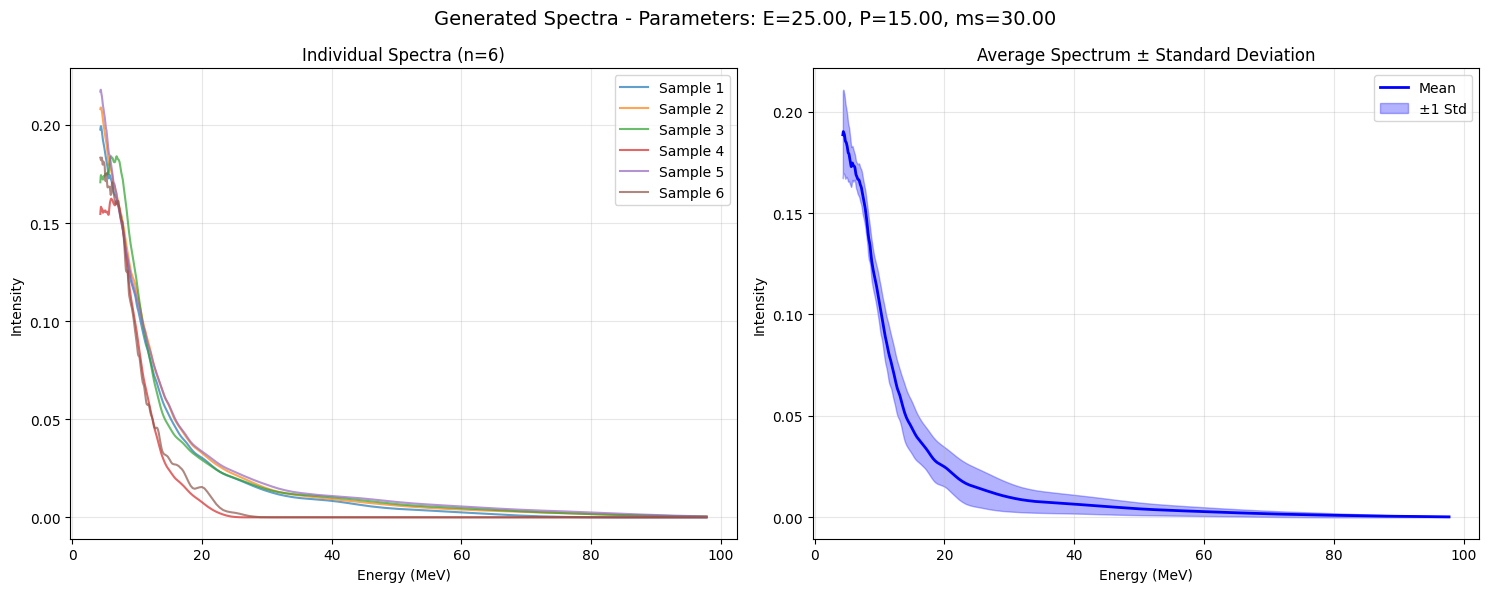

📊 Statistics:
  Mean intensity: 0.1067
  Max intensity: 0.1902
  Total integrated intensity: 27.3175
  Weighted sum (I × E): 214.6970
✅ Generated 6 spectra with shape (6, 256)
   Energy axis: 256 points, 4.35-97.77 MeV

📈 Demo 2: Batch Parameter Comparison
------------------------------
Initializing Spectrum Sampling Tool...
Device: auto
Spectrum length: 256
Features: ['E', 'P', 'ms']
Sampling steps: 20
❌ Error loading model: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, maia, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: auto
❌ Error in batch comparison: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, maia, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: auto

🔍 Demo 3: Parameter Sweep
------------------------------
Created 12 parameter combinations:
  1: {'E': 20.0, 'P': 15.0, 'ms': 25.0}
  2: {'E': 20.0, 'P': 15.0, 'ms'

In [1]:
"""
EDM Spectrum Sampling Tool - Demo Script

This script demonstrates how to use the interactive spectrum sampling tool
for generating and visualizing conditional electron spectra.

Usage:
    python spectrum_sampling_demo.py

For Jupyter notebook usage, see the README.md file.
"""

from spectrum_sampling_tool import (
    SpectrumSamplingTool, 
    load_spectrum_tool, 
    quick_sample_and_plot,
    create_parameter_sweep,
    EXAMPLE_PARAMETER_SETS
)

import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def main():
    # Update this path to your trained model
    MODEL_PATH = "models/edm_4kepochs/ema_ckpt_final.pt"
    
    print("🔬 EDM Spectrum Sampling Tool - Demo")
    print("="*50)
    
    # Check if model exists
    if not Path(MODEL_PATH).exists():
        print(f"❌ Model file not found: {MODEL_PATH}")
        print("Please update MODEL_PATH to point to your trained model.")
        return
    
    print(f"✅ Model found: {MODEL_PATH}")
    print(f"🖥️  Device: {'CUDA' if torch.cuda.is_available() else 'CPU'}")
    print()
    
    # Demo 1: Quick sample generation
    print("📊 Demo 1: Quick Sample Generation")
    print("-" * 30)
    
    parameters = {
        "E": 25.0,    # Laser Energy
        "P": 15.0,    # Pressure 
        "ms": 30.0    # Acquisition time (ms)
    }
    
    print(f"Generating spectra with parameters: {parameters}")
    
    try:
        samples, energy_axis = quick_sample_and_plot(
            model_path=MODEL_PATH,
            parameters=parameters,
            n_samples=6,
            device="auto"
        )
        
        print(f"✅ Generated {len(samples)} spectra with shape {samples.shape}")
        print(f"   Energy axis: {len(energy_axis)} points, {energy_axis.min():.2f}-{energy_axis.max():.2f} MeV")
        
    except Exception as e:
        print(f"❌ Error in quick sampling: {e}")
        print("   This might be due to missing dependencies or incorrect model path.")
        return
    
    print("\n" + "="*50)
    print("🎉 Demo completed!")
    print("\nNext steps:")
    print("1. 🚀 Launch interactive tool: Use load_spectrum_tool() in Jupyter")
    print("2. 🔬 Explore parameters: Try different combinations")
    print("3. 📊 Analyze results: Use the batch comparison features")
    print("4. 💾 Export data: Save interesting results for further analysis")
    print("\nFor interactive usage, see the Jupyter notebook examples in the README.")

def interactive_demo():
    """
    Start the interactive tool directly.
    This function can be called from a Jupyter notebook.
    """
    MODEL_PATH = "models/edm_1d_spectrum_256pts_instancenorm_fixeddataset_10kEpochs/ema_ckpt_final.pt"
    
    print("🚀 Starting Interactive Spectrum Sampling Tool...")
    
    if not Path(MODEL_PATH).exists():
        print(f"❌ Model file not found: {MODEL_PATH}")
        print("Please update MODEL_PATH in the function to point to your trained model.")
        return None
    
    # Load and display the interactive tool
    tool = load_spectrum_tool(
        model_path=MODEL_PATH,
        device="auto",
        spectrum_length=256,
        features=["E", "P", "ms"],
        num_sampling_steps=30
    )
    
    return tool

if __name__ == "__main__":
    main() 